In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.datasets import load_iris

In [9]:
iris = load_iris()

In [21]:
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df["target"] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [34]:
x_train = df[["petal length (cm)","petal width (cm)"]]
y_train = iris.target

In [35]:
from sklearn.neighbors import KNeighborsClassifier

In [36]:
knn = KNeighborsClassifier(n_neighbors=5)

In [37]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

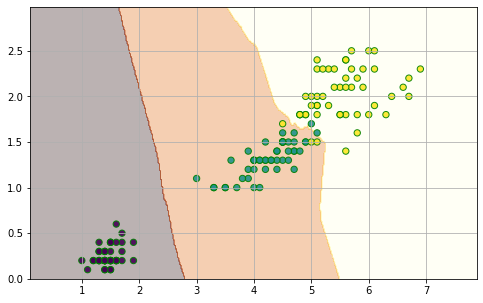

In [38]:
xv = x_train.values.reshape(-1,1)
h = 0.02
x_min,x_max = xv.min(),xv.max()+1
y_min,y_max = y_train.min(),y_train.max()+1
xx,yy = np.meshgrid(np.arange(x_min,x_max,h),
           np.arange(y_min,y_max,h))
z = knn.predict(np.c_[xx.ravel(),yy.ravel()])
z = z.reshape(xx.shape)

plt.figure(figsize=(8,5))
ax = plt.contourf(xx,yy,z,cmap="afmhot",alpha=0.3)
plt.scatter(x_train.values[:,0],x_train.values[:,1],c=y_train,s=40,
            alpha=0.9,edgecolors="g")
plt.grid()

In [39]:
import pandas as pd